# Vehicle Loan Default Prediction

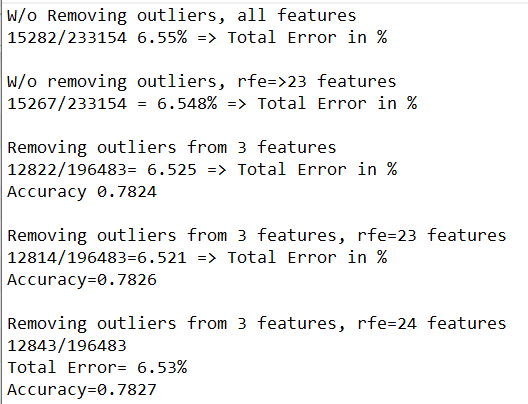

In [779]:
import pandas as pd
import numpy as np
import seaborn as sns


pd.set_option('display.max_column',None)

from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import pearsonr

from matplotlib import pyplot as plt

In [783]:
train_df=pd.read_csv(r"C:\Users\rutuj\OneDrive\Documents\Dataset\VehicleLoanDefaultPrediction\train\\train.csv")
test_df=pd.read_csv(r"C:\Users\rutuj\OneDrive\Documents\Dataset\VehicleLoanDefaultPrediction\test\\test.csv")

In [784]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [785]:
test_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,03-11-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,20-11-18,6,1998,1,1,0,0,0,0,749,C-Very Low Risk,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,29-11-18,4,1646,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,29-11-18,4,1646,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,17-11-18,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [786]:
print(train_df.shape)
data_bkup=train_df
print(data_bkup.shape)

(233154, 41)
(233154, 41)


False    182543
True      50611
Name: loan_default, dtype: int64

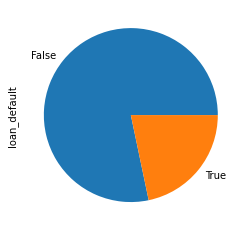

In [787]:
train_df['loan_default'].astype(bool).value_counts().plot.pie()
train_df['loan_default'].astype(bool).value_counts()

In [790]:
def encode_dates(df,column):
    df=df.copy()
    df[column]=pd.to_datetime(df[column], format='%d-%m-%y')
    df[column + '_year']=df[column].apply(lambda x:x.year)
    df[column + '_month']=df[column].apply(lambda x: x.month)
    df[column + '_day']=df[column].apply(lambda x:x.day)
    df=df.drop(column, axis=1)
    return df

def encode_into_months(df,column):
    df=df.copy()
    df[column + '_yrs'] = df[column].apply(lambda x: re.search(r'\d+(?=yrs)', x).group(0)).astype(np.int)
    df[column + '_mon'] = df[column].apply(lambda x: re.search(r'\d+(?=mon)', x).group(0)).astype(np.int)
    df[column + ' in_months']=df[column + '_yrs']*12+df[column + '_mon']
    return df

In [791]:
def remove_outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    lowerLimit=q1-1.5*IQR
    upperLimit=q3+1.5*IQR
    df=df[df[column]<upperLimit]
    df=df[df[column]>lowerLimit]
    return df

In [792]:
#train_data.columns

In [793]:
def preprocess_data(df):

# Dropping Unique ID & MobileNo_Avl_Flag
    df=df.drop(['UniqueID','MobileNo_Avl_Flag'],axis=1)

# Dropping high cardinality features
    df=df.drop(['supplier_id','Current_pincode_ID','Employee_code_ID'], axis=1)

# Fill the missing values of Employment Type with 'Unemployed'
    df['Employment.Type']=df['Employment.Type'].fillna('Unemployed')

    df=encode_dates(df,column='Date.of.Birth')
    df=encode_dates(df,column='DisbursalDate')
    df=df.drop('DisbursalDate_year', axis=1)

    df=encode_into_months(df,column='CREDIT.HISTORY.LENGTH')
    df=df.drop(['CREDIT.HISTORY.LENGTH'],axis=1)
    df=df.drop(['CREDIT.HISTORY.LENGTH_yrs'],axis=1)
    df=df.drop(['CREDIT.HISTORY.LENGTH_mon'],axis=1)

    df=encode_into_months(df,column='AVERAGE.ACCT.AGE')
    df=df.drop(['AVERAGE.ACCT.AGE_yrs'],axis=1)
    df=df.drop(['AVERAGE.ACCT.AGE_mon'],axis=1)
    df=df.drop(['AVERAGE.ACCT.AGE'],axis=1)



# Converting categorical data into numeric using label encoding
    categorical_data=['branch_id', 'manufacturer_id', 'Employment.Type', 'State_ID', 'PERFORM_CNS.SCORE.DESCRIPTION']
    le={}
    for x in categorical_data:
        le[x]=preprocessing.LabelEncoder()
    for x in categorical_data:
        df[x]=le[x].fit_transform(df.__getattr__(x))
    return df    

In [794]:
train_data=preprocess_data(train_df)
train_data['Loan_Default']=train_data['loan_default']
train_data=train_data.drop('loan_default',axis=1)


C:\Users\rutuj\AppData\Local\Temp/ipykernel_18348/1313859915.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[column + '_yrs'] = df[column].apply(lambda x: re.search(r'\d+(?=yrs)', x).group(0)).astype(np.int)
C:\Users\rutuj\AppData\Local\Temp/ipykernel_18348/1313859915.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the preci

C:\Users\rutuj\AppData\Local\Temp/ipykernel_18348/3321469087.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(39,1))


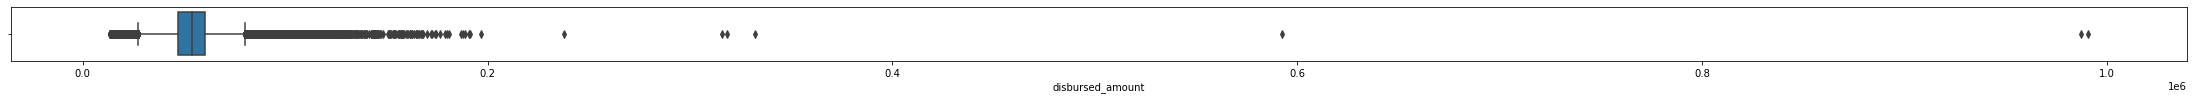

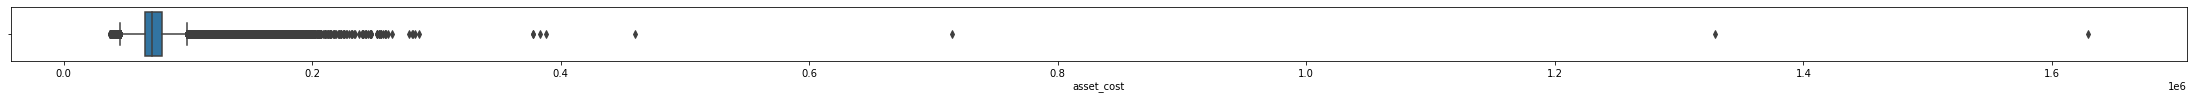

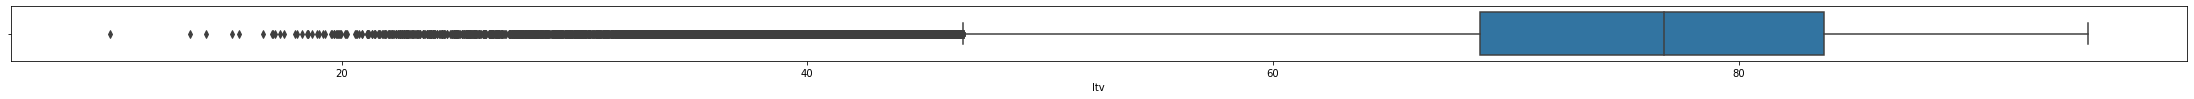

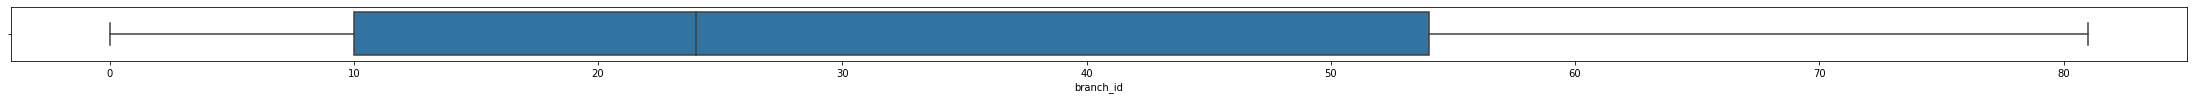

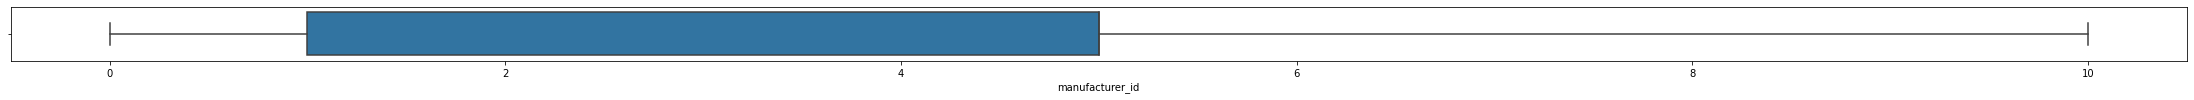

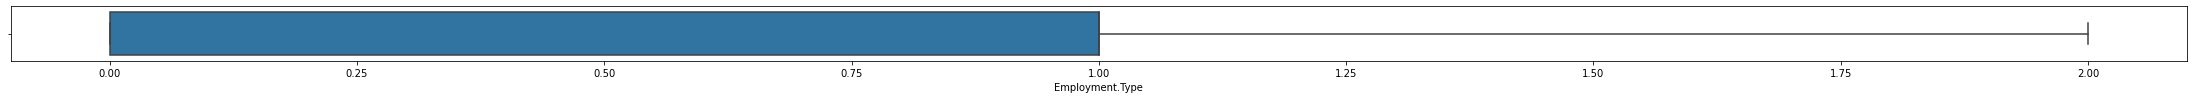

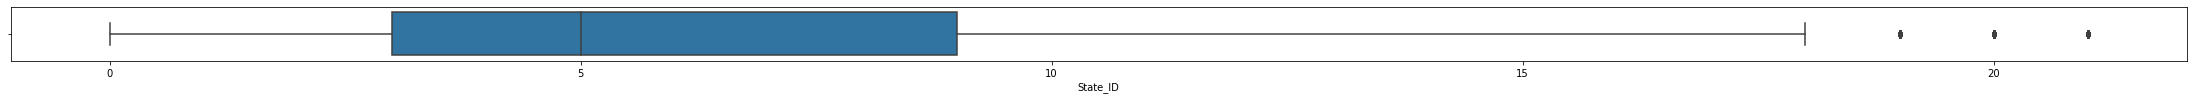

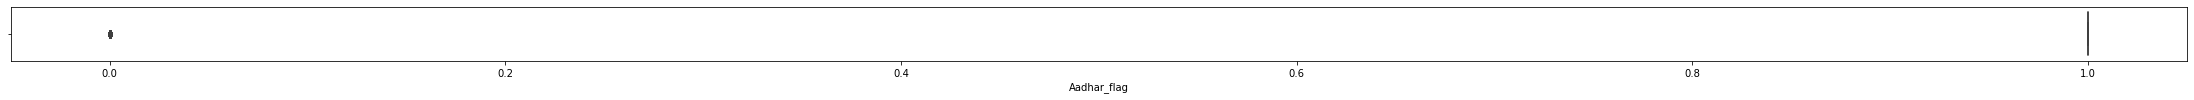

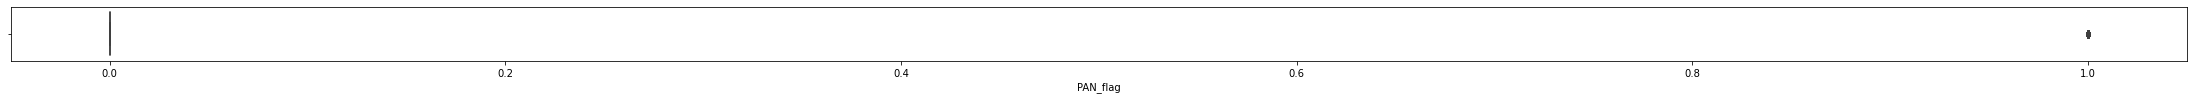

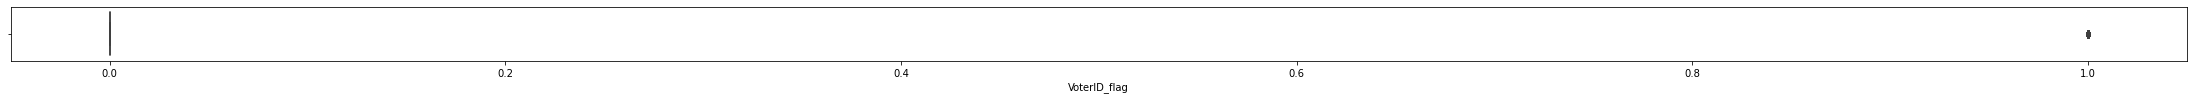

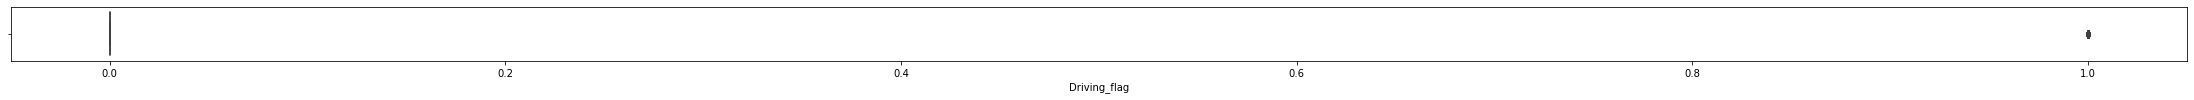

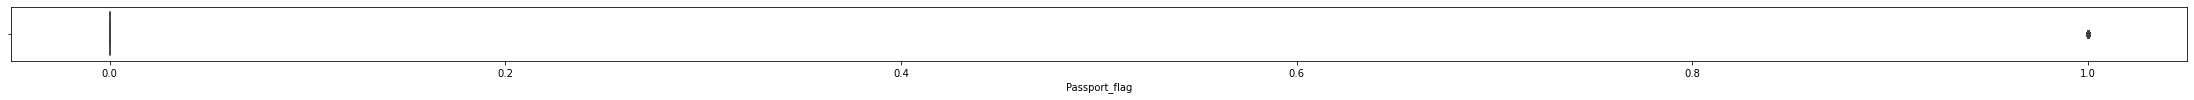

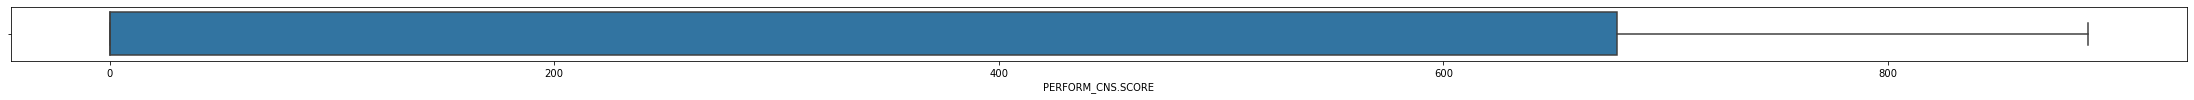

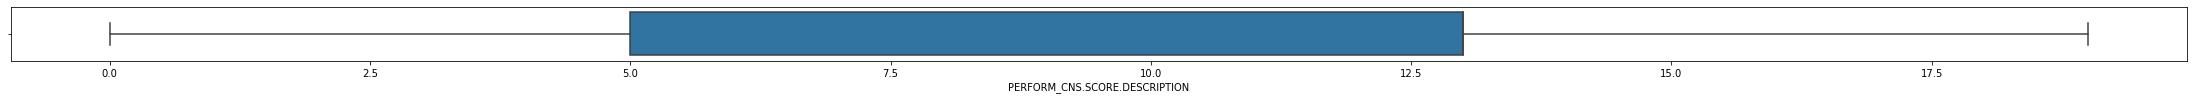

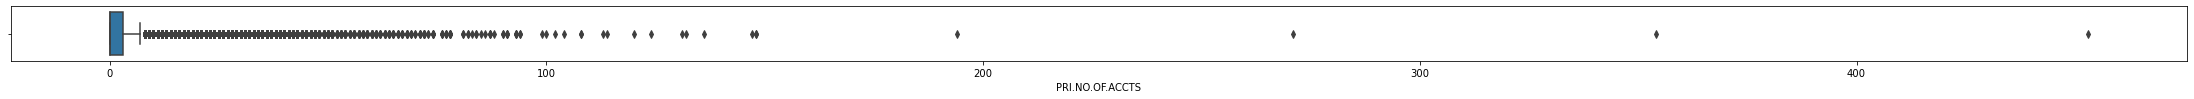

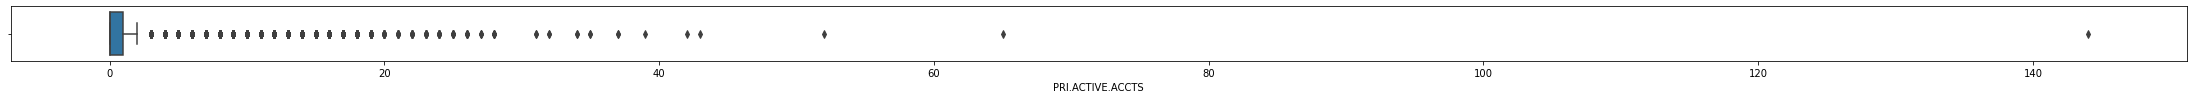

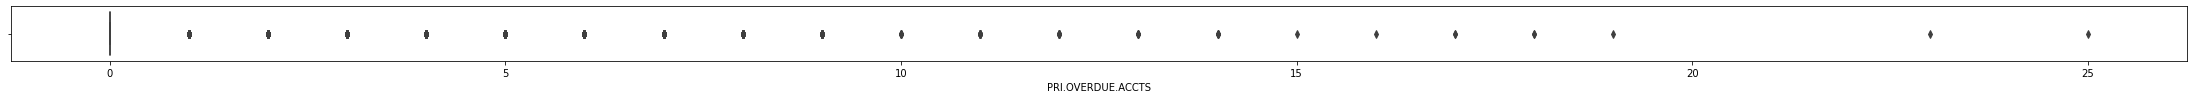

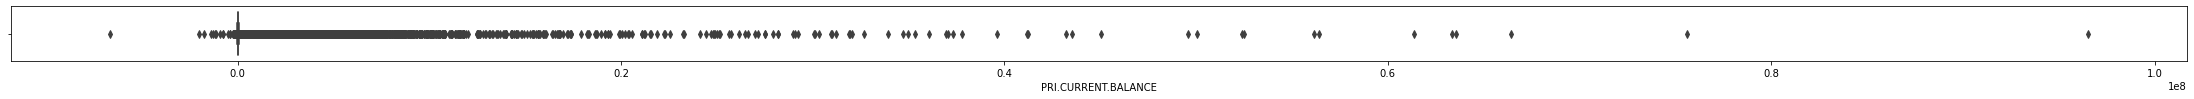

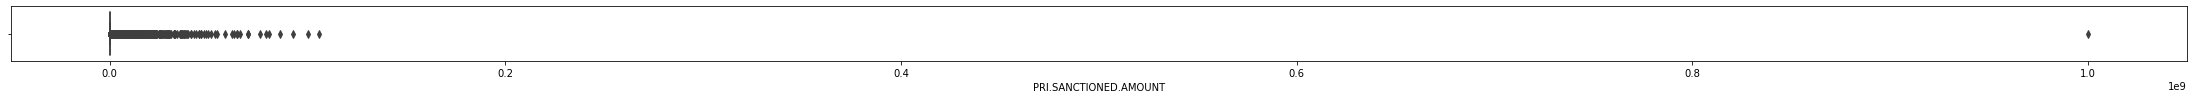

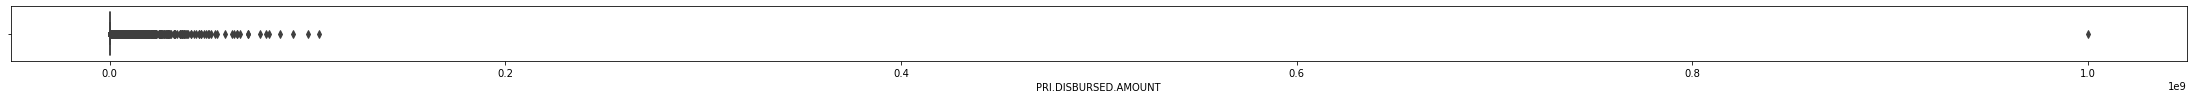

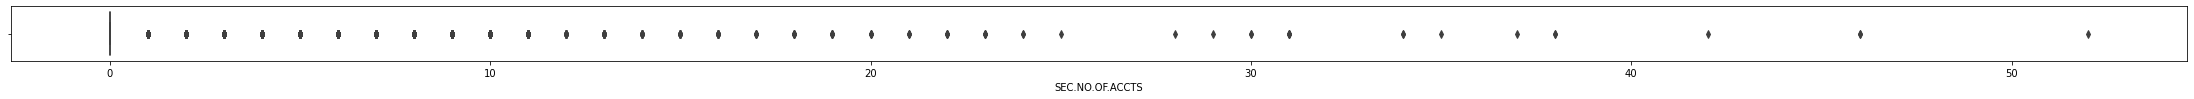

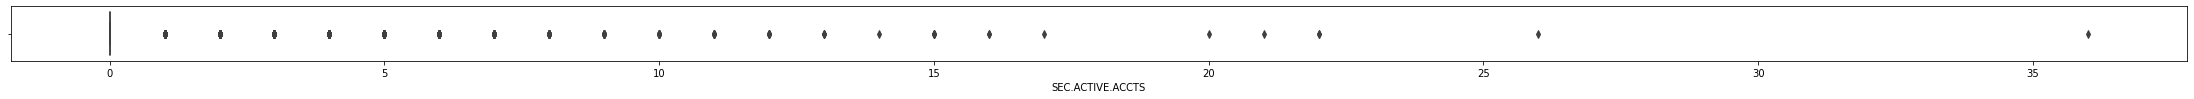

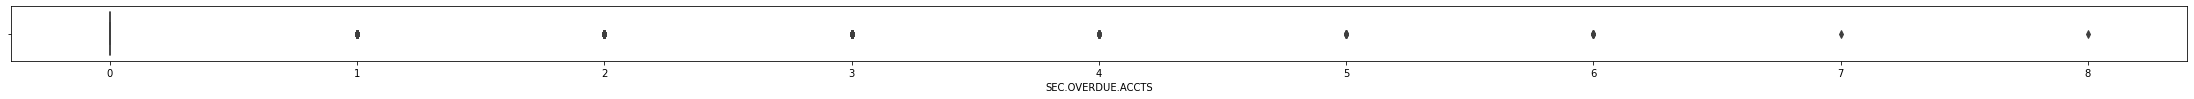

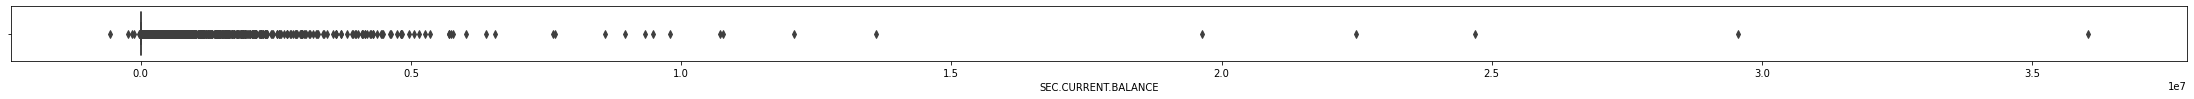

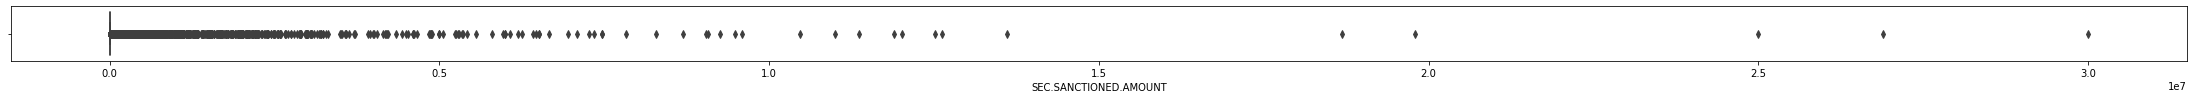

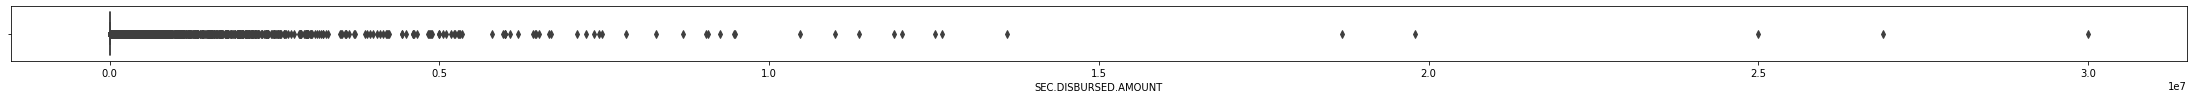

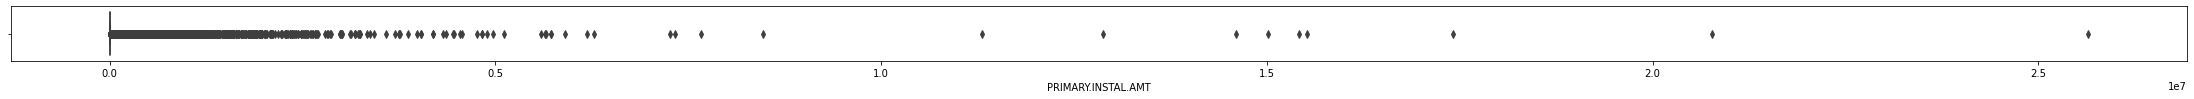

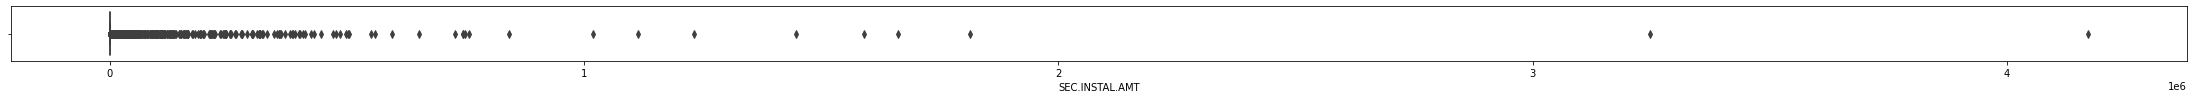

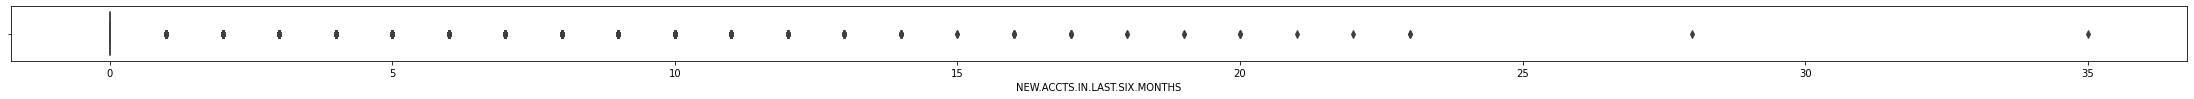

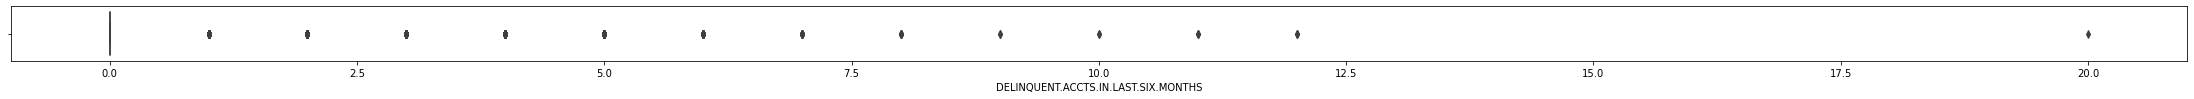

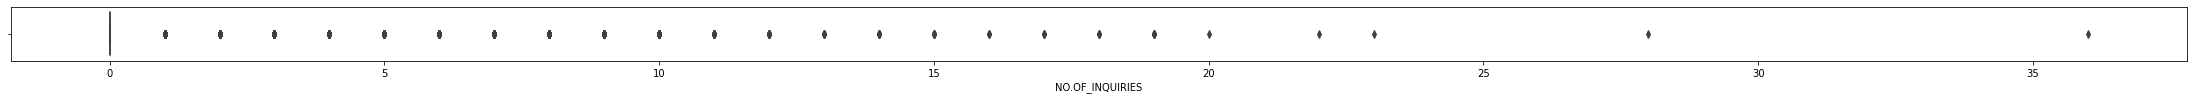

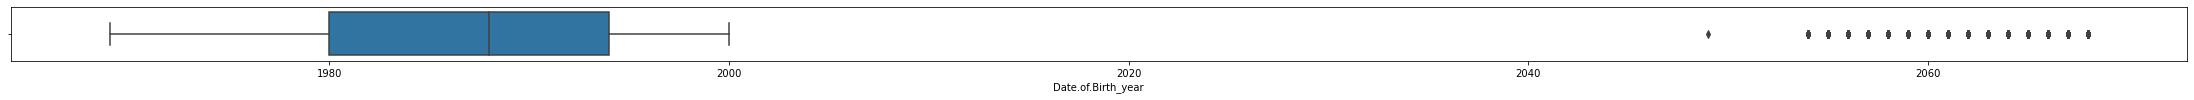

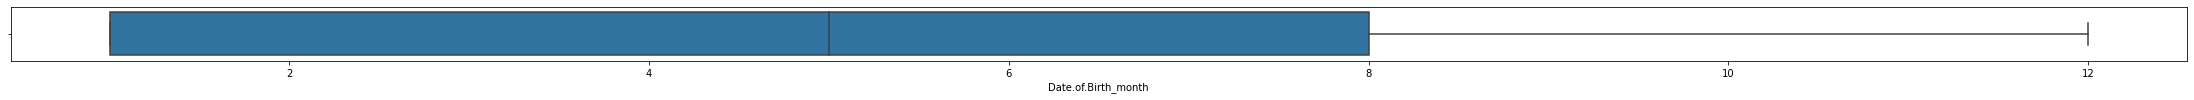

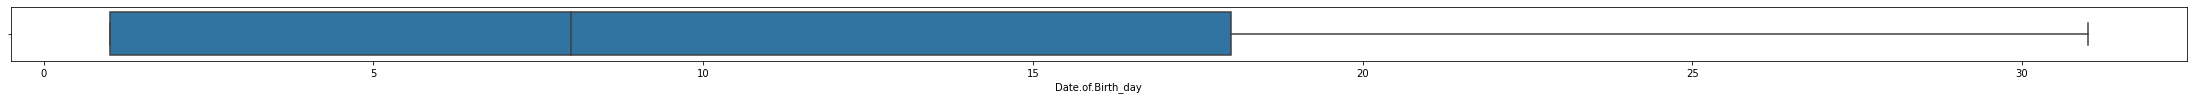

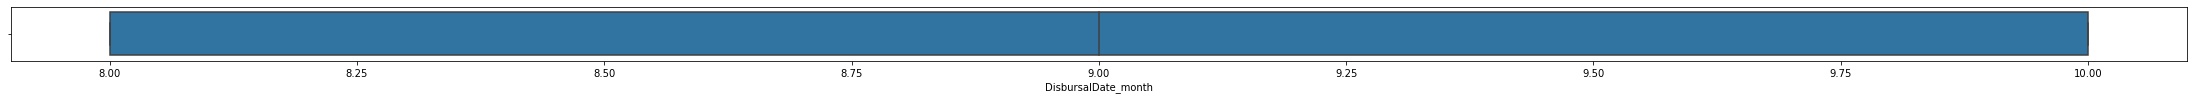

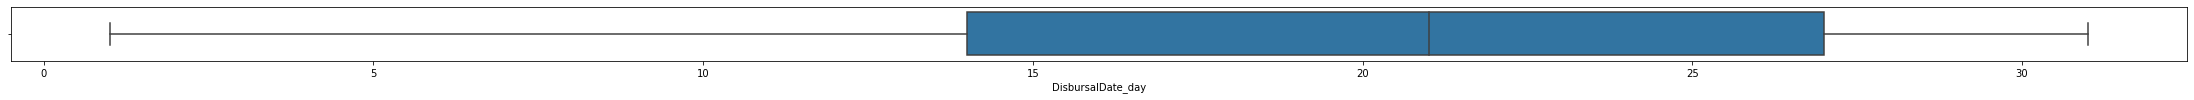

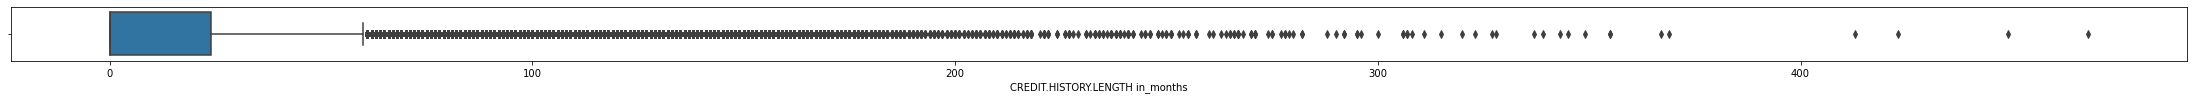

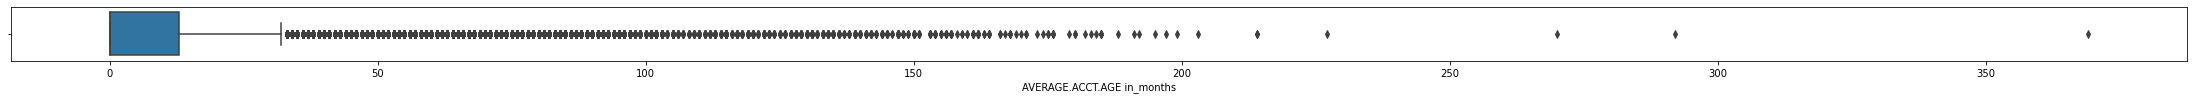

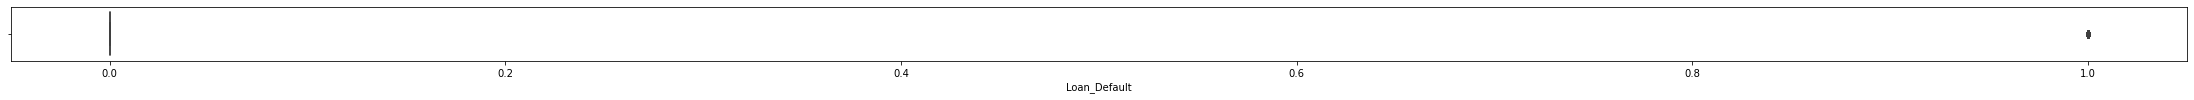

In [795]:
for column in train_data.columns:
        plt.figure(figsize=(39,1))
        sns.boxplot(data=train_data, x=column)

In [796]:
# Removing Outliers

train_data=remove_outliers(train_data,'disbursed_amount')
train_data=remove_outliers(train_data,'asset_cost')
train_data=remove_outliers(train_data,'ltv')
#train_data=remove_outliers(train_data,'State_ID')
#train_data=remove_outliers(train_data,'PRI.ACTIVE.ACCTS')
#train_data=remove_outliers(train_data,'Date.of.Birth_year')
#train_data=remove_outliers(train_data,'PRI.ACTIVE.ACCTS')
#train_data=remove_outliers(train_data,'Date.of.Birth_year')
#train_data=remove_outliers(train_data,'CREDIT.HISTORY.LENGTH in_months')
#train_data=remove_outliers(train_data,'AVERAGE.ACCT.AGE in_months')


In [797]:
train_data.head()

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Employment.Type,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Date.of.Birth_year,Date.of.Birth_month,Date.of.Birth_day,DisbursalDate_month,DisbursalDate_day,CREDIT.HISTORY.LENGTH in_months,AVERAGE.ACCT.AGE in_months,Loan_Default
0,50578,58400,89.55,30,0,0,5,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1984,1,1,8,3,0,0,0
1,47145,65550,73.23,30,0,1,5,1,0,0,0,0,598,8,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,0,1985,7,31,9,26,23,23,1
2,53278,61360,89.63,30,0,1,5,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1985,8,24,8,1,0,0,0
3,57513,66113,88.48,30,0,1,5,1,0,0,0,0,305,11,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1993,12,30,10,26,15,8,1
4,52378,60300,88.39,30,0,1,5,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1977,12,9,9,26,0,0,1


In [798]:
train_data.shape

(196483, 39)

In [799]:
train_data.head()

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Employment.Type,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Date.of.Birth_year,Date.of.Birth_month,Date.of.Birth_day,DisbursalDate_month,DisbursalDate_day,CREDIT.HISTORY.LENGTH in_months,AVERAGE.ACCT.AGE in_months,Loan_Default
0,50578,58400,89.55,30,0,0,5,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1984,1,1,8,3,0,0,0
1,47145,65550,73.23,30,0,1,5,1,0,0,0,0,598,8,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,0,1985,7,31,9,26,23,23,1
2,53278,61360,89.63,30,0,1,5,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1985,8,24,8,1,0,0,0
3,57513,66113,88.48,30,0,1,5,1,0,0,0,0,305,11,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1993,12,30,10,26,15,8,1
4,52378,60300,88.39,30,0,1,5,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1977,12,9,9,26,0,0,1


In [800]:
# Scale the Train & Test Data
def scale_data(df):
    scaler=StandardScaler()
    scaler.fit(df)
    df_scaled=scaler.transform(df)
    return df_scaled


In [801]:
y=train_data.Loan_Default.copy()
X=train_data.drop(['Loan_Default'],axis=1)

In [802]:
X_scaled=scale_data(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=123)


In [803]:
#y_train.value_counts()

In [804]:
#print(X_train)
#print(X_train.shape)

In [805]:
# Fit a Logistic Regression Model

model= LogisticRegression()
model.fit(X_train, y_train)

    

LogisticRegression()

In [806]:
#model=fit_model(X_train,y_train)
y_pred=pd.Series(model.predict(X_test))
y_test=y_test.reset_index(drop=True)

In [807]:
print(y_test)

0        0
1        0
2        0
3        0
4        0
        ..
58940    1
58941    0
58942    0
58943    1
58944    0
Name: Loan_Default, Length: 58945, dtype: int64


In [808]:
#print(y_pred)

In [809]:
z=pd.concat([y_test,y_pred],axis=1)
z.columns=['True','Predicted']
z.head()

,True,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [810]:
#OR But this will store in list form
a=list(zip(y_test,y_pred))


In [811]:
cfm_matrix= metrics.confusion_matrix(y_test,y_pred)
print(cfm_matrix)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("Classification Report", metrics.classification_report(y_test,y_pred))

[[46061    95]
 [12727    62]]
Accuracy:  0.7824751887352617
Precision:  0.39490445859872614
Recall:  0.004847916177965439
Classification Report               precision    recall  f1-score   support

           0       0.78      1.00      0.88     46156
           1       0.39      0.00      0.01     12789

    accuracy                           0.78     58945
   macro avg       0.59      0.50      0.44     58945
weighted avg       0.70      0.78      0.69     58945



In [812]:
# Deciding the cut off
def get_result_analysis(y_test,y_pred_prob):
    result_analysis=pd.DataFrame(columns=["Cut-Off","True_Negative_[0,0]","True_Positive_[1,1]","Type_2_Error","Total_Error","Type_1_Error","Accuracy"])
    i=0
    for a in np.arange(0,1,0.025):
        new_predicted=np.where(y_pred_prob[:,0]<a,1,0)
        new_predicted=pd.Series(new_predicted)
        cfm=metrics.confusion_matrix(y_test,new_predicted)
        total_error=cfm[0,1]+cfm[1,0]
        type_2_error=cfm[1,0]
        type_1_error=cfm[0,1]
        accuracy=metrics.accuracy_score(y_test,new_predicted)
        result_analysis.at[i,'Cut-Off']=a
        result_analysis.at[i,'True_Negative_[0,0]']=cfm[0,0]
        result_analysis.at[i,'True_Positive_[1,1]']=cfm[1,1]
        result_analysis.at[i,'Type_2_Error']=type_2_error
        result_analysis.at[i,'Total_Error']=total_error
        result_analysis.at[i,'Type_1_Error']=type_1_error
        result_analysis.at[i,'Accuracy']=accuracy
        i=i+1
    return result_analysis

In [813]:
result_analysis_table=pd.DataFrame()
y_pred_prob=model.predict_proba(X_test)
result_analysis_table=get_result_analysis(y_test,y_pred_prob)
result_analysis_table

,Cut-Off,"True_Negative_[0,0]","True_Positive_[1,1]",Type_2_Error,Total_Error,Type_1_Error,Accuracy
0,0.0,46156,0,12789,12789,0,0.783035
1,0.025,46156,0,12789,12789,0,0.783035
2,0.05,46155,0,12789,12790,1,0.783018
3,0.075,46155,0,12789,12790,1,0.783018
4,0.1,46155,1,12788,12789,1,0.783035
5,0.125,46154,2,12787,12789,2,0.783035
6,0.15,46154,3,12786,12788,2,0.783052
7,0.175,46152,4,12785,12789,4,0.783035
8,0.2,46151,4,12785,12790,5,0.783018
9,0.225,46148,5,12784,12792,8,0.782984


In [814]:
cv=KFold(n_splits=10, random_state=1,shuffle=True)
scores=cross_val_score(model,X_train,y_train, scoring='accuracy',cv=cv,n_jobs=-1)

In [815]:
print("Accuracy: %.3f (%.3f)"%(np.mean(scores), np.std(scores)))


Accuracy: 0.781 (0.005)


In [816]:
train_data.shape

(196483, 39)

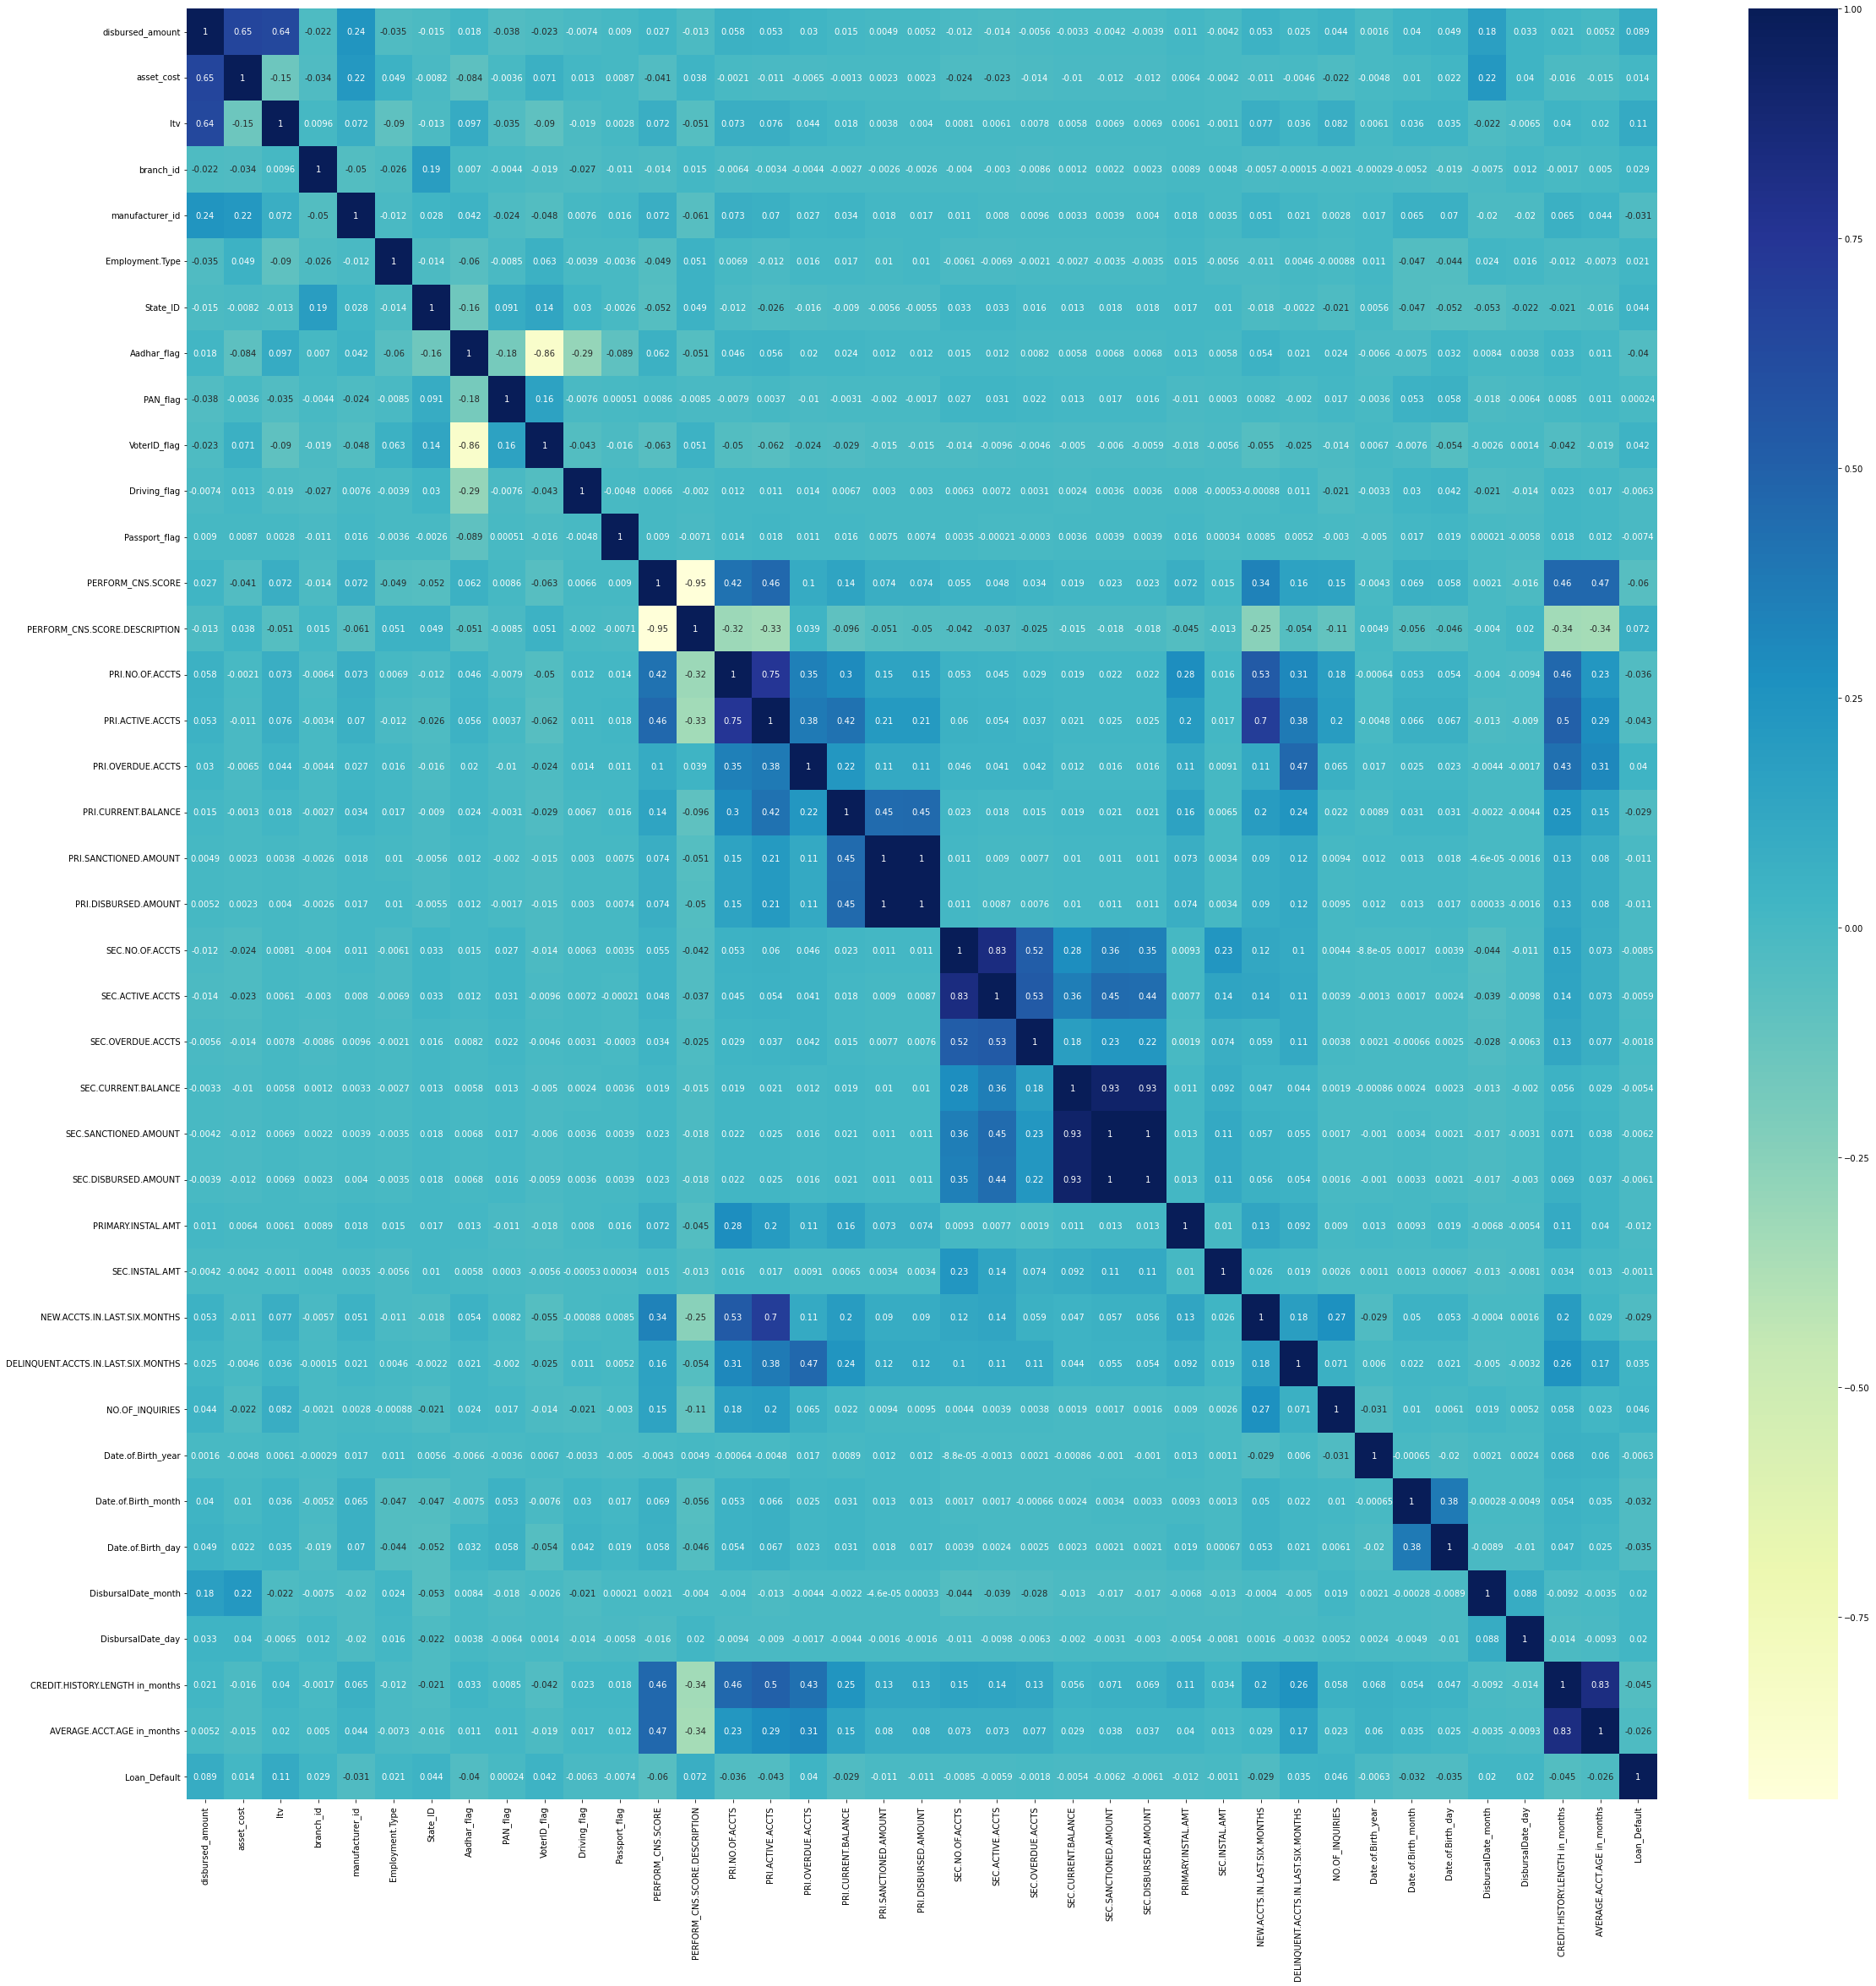

In [817]:
# Feature Selection

# 1. Heatmap

corrmat=train_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(39,39))
g=sns.heatmap(train_data[top_corr_features].corr(), annot=True,cmap='YlGnBu')

In [819]:
column_names=train_data.columns
print(column_names)
# ['disbursed_amount','ltv','State_ID','VoterID_flag','PERFORM_CNS.SCORE','PERFORM_CNS.SCORE.DESCRIPTION','PRI.NO.OF.ACCTS','PRI.OVERDUE.ACCTS','NO.OF_INQUIRIES','CREDIT.HISTORY.LENGTH in_months']
X_selected_features=X[['disbursed_amount','ltv','State_ID','PERFORM_CNS.SCORE','PERFORM_CNS.SCORE.DESCRIPTION','NO.OF_INQUIRIES','CREDIT.HISTORY.LENGTH in_months']]

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'manufacturer_id',
       'Employment.Type', 'State_ID', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'Date.of.Birth_year', 'Date.of.Birth_month',
       'Date.of.Birth_day', 'DisbursalDate_month', 'DisbursalDate_day',
       'CREDIT.HISTORY.LENGTH in_months', 'AVERAGE.ACCT.AGE in_months',
       'Loan_Default'],
      dtype='object')


In [820]:
#X_selected_features.head()
X_scaled=scale_data(X_selected_features)
X_train,X_test,y_train,y_new_test=train_test_split(X_scaled,y,test_size=0.30,random_state=123)


In [821]:
model= LogisticRegression()
model.fit(X_train, y_train)
y_new_predicted_class=model.predict(X_test)

In [822]:
cfm_matrix= metrics.confusion_matrix(y_new_test,y_new_predicted_class)
print(cfm_matrix)
print("Accuracy: ", metrics.accuracy_score(y_new_test,y_new_predicted_class))
print("Precision: ", metrics.precision_score(y_new_test,y_new_predicted_class))
print("Recall: ", metrics.recall_score(y_new_test,y_new_predicted_class))
print("Classification Report", metrics.classification_report(y_new_test,y_new_predicted_class))

[[46127    29]
 [12768    21]]
Accuracy:  0.7828993129188226
Precision:  0.42
Recall:  0.0016420361247947454
Classification Report               precision    recall  f1-score   support

           0       0.78      1.00      0.88     46156
           1       0.42      0.00      0.00     12789

    accuracy                           0.78     58945
   macro avg       0.60      0.50      0.44     58945
weighted avg       0.70      0.78      0.69     58945



In [823]:
y_new_pred_prob=model.predict_proba(X_test)
result_analysis_table=pd.DataFrame()
result_analysis_table=get_result_analysis(y_new_test,y_new_pred_prob)
result_analysis_table

,Cut-Off,"True_Negative_[0,0]","True_Positive_[1,1]",Type_2_Error,Total_Error,Type_1_Error,Accuracy
0,0.0,46156,0,12789,12789,0,0.783035
1,0.025,46156,0,12789,12789,0,0.783035
2,0.05,46156,0,12789,12789,0,0.783035
3,0.075,46156,0,12789,12789,0,0.783035
4,0.1,46156,0,12789,12789,0,0.783035
5,0.125,46156,0,12789,12789,0,0.783035
6,0.15,46156,0,12789,12789,0,0.783035
7,0.175,46156,0,12789,12789,0,0.783035
8,0.2,46155,0,12789,12790,1,0.783018
9,0.225,46155,0,12789,12790,1,0.783018


In [824]:

# 2. Recursive Feature Elimination (Worked well for this data)

rfe=RFE(model,24)

X_scaled=scale_data(X)
X_train,X_test,y_train,y_new_test=train_test_split(X_scaled,y,test_size=0.30,random_state=123)

model_rfe=rfe.fit(X_train,y_train)


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=24 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

In [825]:
print("Num Features: ", model_rfe.n_features_)
print("Selected Features: ")
colname=pd.Series(train_data.columns[:-1])
column_support=pd.Series(model_rfe.support_)
feature_ranking=pd.Series(model_rfe.ranking_)
selected_columns=pd.concat([colname,column_support,feature_ranking],axis=1)
selected_columns.columns=['Column Name','Selected','feature_ranking']
selected_columns

Num Features:  24
Selected Features: 


,Column Name,Selected,feature_ranking
0,disbursed_amount,False,2
1,asset_cost,True,1
2,ltv,True,1
3,branch_id,True,1
4,manufacturer_id,True,1
5,Employment.Type,True,1
6,State_ID,True,1
7,Aadhar_flag,True,1
8,PAN_flag,False,14
9,VoterID_flag,False,13


In [826]:
y_new_predicted=model_rfe.predict(X_test)

In [827]:
cfm_matrix= metrics.confusion_matrix(y_new_test,y_new_predicted)
print(cfm_matrix)
print("Accuracy: ", metrics.accuracy_score(y_new_test,y_new_predicted))
print("Precision: ", metrics.precision_score(y_new_test,y_new_predicted))
print("Recall: ", metrics.recall_score(y_new_test,y_new_predicted))
print("Classification Report", metrics.classification_report(y_new_test,y_new_predicted))

[[46073    83]
 [12725    64]]
Accuracy:  0.7827126982780558
Precision:  0.43537414965986393
Recall:  0.005004300570803034
Classification Report               precision    recall  f1-score   support

           0       0.78      1.00      0.88     46156
           1       0.44      0.01      0.01     12789

    accuracy                           0.78     58945
   macro avg       0.61      0.50      0.44     58945
weighted avg       0.71      0.78      0.69     58945



In [828]:
y_new_pred_prob=model_rfe.predict_proba(X_test)
result_analysis_table=pd.DataFrame()
result_analysis_table=get_result_analysis(y_new_test,y_new_pred_prob)
result_analysis_table

,Cut-Off,"True_Negative_[0,0]","True_Positive_[1,1]",Type_2_Error,Total_Error,Type_1_Error,Accuracy
0,0.0,46156,0,12789,12789,0,0.783035
1,0.025,46156,0,12789,12789,0,0.783035
2,0.05,46155,0,12789,12790,1,0.783018
3,0.075,46155,1,12788,12789,1,0.783035
4,0.1,46155,1,12788,12789,1,0.783035
5,0.125,46154,2,12787,12789,2,0.783035
6,0.15,46154,4,12785,12787,2,0.783069
7,0.175,46153,4,12785,12788,3,0.783052
8,0.2,46151,4,12785,12790,5,0.783018
9,0.225,46149,4,12785,12792,7,0.782984


In [701]:
# 3. Feature Importance
model_etc=ExtraTreesClassifier()
model_etc.fit(X,y)

ExtraTreesClassifier()

In [702]:
print(model_etc.feature_importances_)

[0.08254364 0.07882187 0.08736809 0.06128437 0.03283907 0.02636656
 0.05076228 0.00477523 0.00844517 0.00454051 0.00316439 0.00058188
 0.0237782  0.02030539 0.0204716  0.01687282 0.00926659 0.01875879
 0.01860745 0.01854867 0.00319687 0.00169868 0.00106667 0.00145715
 0.00154056 0.0015221  0.02061021 0.001634   0.01379526 0.00916928
 0.02270779 0.07732685 0.0530928  0.05684834 0.0258609  0.07401048
 0.02326317 0.02309632]


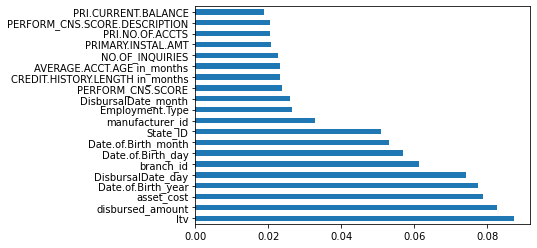

In [703]:
feature_importances=pd.Series(model_etc.feature_importances_,index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

In [69]:
column_names=train_data.columns
#print(column_names)

X_selected_features=X[['disbursed_amount','asset_cost','ltv','Date.of.Birth_year','DisbursalDate_day','branch_id','Date.of.Birth_day','Date.of.Birth_month','State_ID']]

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'manufacturer_id',
       'Employment.Type', 'State_ID', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'Date.of.Birth_year', 'Date.of.Birth_month',
       'Date.of.Birth_day', 'DisbursalDate_month', 'DisbursalDate_day',
       'CREDIT.HISTORY.LENGTH in_months', 'AVERAGE.ACCT.AGE in_months',
       'Loan_Default'],
      dtype='object')


In [349]:
#X_selected_features.head()
X_scaled=scale_data(X_selected_features)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=123)


In [350]:
model= LogisticRegression()
model.fit(X_train, y_train)
new_y=model.predict(X_test)

In [351]:
cfm_matrix= metrics.confusion_matrix(y_test,new_y)
print(cfm_matrix)
print("Accuracy: ", metrics.accuracy_score(y_test,new_y))
print("Precision: ", metrics.precision_score(y_test,new_y))
print("Recall: ", metrics.recall_score(y_test,new_y))
print("Classification Report", metrics.classification_report(y_test,new_y))

[[28816    28]
 [ 8635    29]]
Accuracy:  0.76903593899968
Precision:  0.5087719298245614
Recall:  0.003347183748845799
Classification Report               precision    recall  f1-score   support

           0       0.77      1.00      0.87     28844
           1       0.51      0.00      0.01      8664

    accuracy                           0.77     37508
   macro avg       0.64      0.50      0.44     37508
weighted avg       0.71      0.77      0.67     37508



In [352]:
y_new_pred_prob=model.predict_proba(X_test)
result_analysis_table=pd.DataFrame()
result_analysis_table=get_result_analysis(y_test,y_new_pred_prob)
result_analysis_table

,Cut-Off,"True_Negative_[0,0]","True_Positive_[1,1]",Type_2_Error,Total_Error,Type_1_Error,Accuracy
0,0.0,28844,0,8664,8664,0,0.769009
1,0.05,28843,0,8664,8665,1,0.768983
2,0.1,28843,0,8664,8665,1,0.768983
3,0.15,28843,0,8664,8665,1,0.768983
4,0.2,28842,0,8664,8666,2,0.768956
5,0.25,28842,1,8663,8665,2,0.768983
6,0.3,28842,1,8663,8665,2,0.768983
7,0.35,28841,2,8662,8665,3,0.768983
8,0.4,28837,5,8659,8666,7,0.768956
9,0.45,28832,12,8652,8664,12,0.769009


In [285]:
X.head()

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Employment.Type,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Date.of.Birth_year,Date.of.Birth_month,Date.of.Birth_day,DisbursalDate_month,DisbursalDate_day,CREDIT.HISTORY.LENGTH in_months,AVERAGE.ACCT.AGE in_months
0,50578,58400,89.55,30,0,0,5,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1984,1,1,8,3,0,0
1,47145,65550,73.23,30,0,1,5,1,0,0,0,0,598,8,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,0,1985,7,31,9,26,23,23
2,53278,61360,89.63,30,0,1,5,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1985,8,24,8,1,0,0
3,57513,66113,88.48,30,0,1,5,1,0,0,0,0,305,11,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1993,12,30,10,26,15,8
4,52378,60300,88.39,30,0,1,5,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1977,12,9,9,26,0,0
